to check if there is higher click to rate in landing page for a website by changing the wordings on the button from secure free trial to enroll now.

the business hypothesis is that the new button bring 10% higher click to rate than older version.

null hypothesis ho : pcon = pexp
alternative hypothesis h1 pcon != pexp

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df_ab_test = pd.read_csv('/Users/pavithrasusanmathew/Downloads/ab_data.csv',encoding = 'ascii')

In [13]:
print(df_ab_test.head())

   user_id                   timestamp      group landing_page  converted
0   851104  2017-01-21 22:11:48.556739    control     old_page        0.0
1   804228  2017-01-12 08:01:45.159739    control     old_page        0.0
2   661590  2017-01-11 16:55:06.154213  treatment     new_page        0.0
3   853541  2017-01-08 18:28:03.143765  treatment     new_page        0.0
4   864975  2017-01-21 01:52:26.210827    control     old_page        1.0


In [9]:
import chardet  #to know the encoding

with open('/Users/pavithrasusanmathew/Downloads/ab_data.csv', 'rb') as f:
    result = chardet.detect(f.read())
print(result['encoding'])

ascii


In [8]:
pip install chardet

Note: you may need to restart the kernel to use updated packages.


In [15]:
print(type(df_ab_test))

<class 'pandas.core.frame.DataFrame'>


In [16]:
print(df_ab_test.describe())

             user_id      converted
count  113510.000000  113509.000000
mean   787320.155132       0.119206
std     91154.223392       0.324033
min         8.000000       0.000000
25%    708352.250000       0.000000
50%    787209.000000       0.000000
75%    866019.250000       0.000000
max    945997.000000       1.000000


In [18]:
print(df_ab_test.groupby(by = "group").sum("converted"))

               user_id  converted
group                            
control    44588025419     6780.0
treatment  44780685382     6751.0


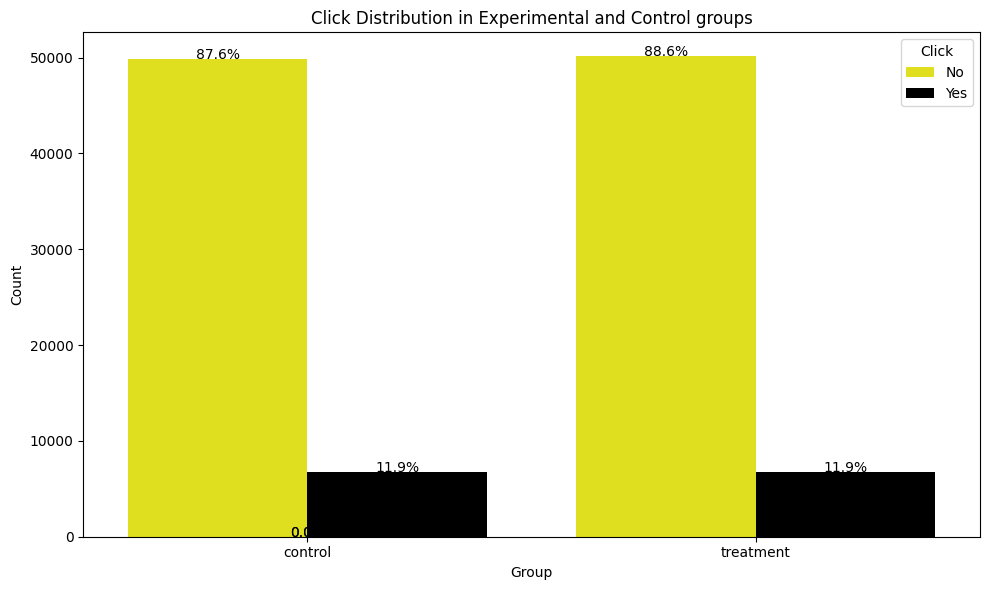

In [21]:
#custom palette for yellow and black
palette = {0: 'yellow' , 1: 'black'} #assuming 0 is for no click, 1 for click


#Plotting the click distribution for each group with custom colours
plt.figure(figsize = (10,6))
ax = sns.countplot(x="group" , hue = "converted",data = df_ab_test, palette = palette)
plt.title("Click Distribution in Experimental and Control groups")
plt.xlabel("Group")
plt.ylabel("Count")
plt.legend(title = "Click", labels = ["No","Yes"])


#calculate the percentages and annotate the bars
group_counts = df_ab_test.groupby(['group']).size()
group_click_counts = df_ab_test.groupby(['group','converted']).size().reset_index(name = 'count')

for p in ax.patches:
    height = p.get_height()
    #find the group and click type for the current bar
    group = "treatment" if p.get_x() < 0.5 else 'control'
    click = 1 if p.get_x() % 1 > 0.5 else 0
    total = 1 if p.get_x() % 1 > 0.5 else 0
    total = group_counts.loc[group]
    percentage = 100*height / total
    ax.text(p.get_x() + p.get_width() /2., height+5, f'{percentage:.1f}%', ha = "center", color = "black", fontsize = 10)

plt.tight_layout()
plt.show()






Parameters of thr Model from Power Analysis
β : probability of type 2 error
(1-β) : power of the test
α : probability of type 1 error , significance level
δ :Minimum Detectable effect




In [22]:
alpha = 0.05 #5%
print("Alpha : significance level is :" , alpha)

#industry standard of 5 per cent and for sgnificance test we compare this with the p value.
#beta value is ot relevant in this case study because we arent creating a min sample 

delta=0.1 #10 %
print("Delta: minimum detectable effect is:" , delta)

#it helps us to understand if having this statistical difference is large enough to accept the business decision that is to launch this business decision. 
#delta value should be considered with the lower bound of the confidence interval

Alpha : significance level is : 0.05
Delta: minimum detectable effect is: 0.1


Calculating the total number of clicks per group by summing clicks

In [40]:
N_con = df_ab_test[df_ab_test["group"] == "control"].count()
N_exp = df_ab_test[df_ab_test["group"] == "treatment"].count()

X_con = df_ab_test.groupby("group")["converted"].sum().loc["control"]
X_exp = df_ab_test.groupby("group")["converted"].sum().loc["treatment"]

#printing this for visibility
print(df_ab_test.groupby("group")["converted"].sum())
print("Number of users in control:" , N_con)
print("Number of users in experimental:" , N_exp)
print("Number of Clicks in control:" , X_con)
print("Number of clicks in experimental:", X_exp)

group
control      6780.0
treatment    6751.0
Name: converted, dtype: float64
Number of users in control: user_id         56618
timestamp       56618
group           56618
landing_page    56618
converted       56618
dtype: int64
Number of users in experimental: user_id         56891
timestamp       56891
group           56891
landing_page    56891
converted       56891
dtype: int64
Number of Clicks in control: 6780.0
Number of clicks in experimental: 6751.0


Calculating Pooled Estimates for clicks pe 

In [41]:
#computing the estimate of click probability per group
p_con_hat = X_con/N_con
p_exp_hat = X_exp/N_exp

print("Click probability in Control Group:" , p_con_hat)
print("Click Probability in Experimental Group:" , p_exp_hat)

#computing the estimate of pooled clicked probability
p_pooled_hat = (X_con + X_exp) / (N_con + N_exp)
print("Pooled clicked probability " ,p_pooled_hat)





Click probability in Control Group: user_id         0.11975
timestamp       0.11975
group           0.11975
landing_page    0.11975
converted       0.11975
dtype: float64
Click Probability in Experimental Group: user_id         0.118666
timestamp       0.118666
group           0.118666
landing_page    0.118666
converted       0.118666
dtype: float64
Pooled clicked probability  user_id         0.119206
timestamp       0.119206
group           0.119206
landing_page    0.119206
converted       0.119206
dtype: float64


Calculating Pooled Variance

In [43]:
#computing the estimate of pooled variance
pooled_variance = p_pooled_hat * (1-p_pooled_hat) * (1/N_con +1/N_exp)
print("p_pooled_hat: ", p_pooled_hat)
print("pooled_variance is:", pooled_variance)

p_pooled_hat:  user_id         0.119206
timestamp       0.119206
group           0.119206
landing_page    0.119206
converted       0.119206
dtype: float64
pooled_variance is: user_id         0.000004
timestamp       0.000004
group           0.000004
landing_page    0.000004
converted       0.000004
dtype: float64


In [44]:
#when the sample size is more than 30 like here it means that you can say that the distribution is normal and you can either go with Z test or t test

Calculating Standard error and Test statistics

In [46]:
#computingthe standard error of the test
SE = np.sqrt(pooled_variance)
print("Standard error is:" , SE)

#computing the test statistics of Z test
Test_stat = (p_con_hat - p_exp_hat)/SE
print("Test statistics for z-sample z-test is:" ,Test_stat)

#critical value of the z-test
z_crit = norm.ppf(1-alpha/2)
print("z critical value from standard normal distribution:" , z_crit)

Standard error is: user_id         0.001924
timestamp       0.001924
group           0.001924
landing_page    0.001924
converted       0.001924
dtype: float64
Test statistics for z-sample z-test is: user_id         0.563742
timestamp       0.563742
group           0.563742
landing_page    0.563742
converted       0.563742
dtype: float64
z critical value from standard normal distribution: 1.959963984540054


absolute value test statistics is greater than critical value then you can reject the null hypothesis.

Calculating p_values of the z test

- a low p_value (p<- 0.05 at 5% significance level) indicates strong evidence against the null hypothesis, so we reject the null hypothesis
- a high p_value(p>0.05 ) indicates weak eveidence against the null hypothesis, so we fail to reject the null hypothesis.

In [59]:
#calculating p value
p_value = 2*norm.sf(abs(Test_stat))
rounded_p_value = np.round(p_value,3)
rounded_p_value = rounded_p_value[0]
#function checking statistical significance
def is_statistical_significance(p_value, alpha):
    """
    we asses whether there is statistical significance based on the p-value and alpha.
    arguments:

    - p value (float): The p-value resulting from a statistical test.
    - alpha (float, optional): The significance level threshold used to determine statistical signifance. Defaults to0.05
    Returns:

    -Prints the assessment of statistical significance.

    """
    #Print the rounded p-value to 3 decimal places

    print(f"P-Value of the 2 sample Z test: {rounded_p_value}")

    #Determine statistical significance
    if rounded_p_value <= alpha:
        print("There is statistical significance, indicating that the observed differences between the groups are unlikely to have occured due to random chance")
    else:
        print("There is no statistical significance , suggesting that the observed differences between the groups could have occurred by chance.")


is_statistical_significance(p_value,alpha)

P-Value of the 2 sample Z test: 0.573
There is no statistical significance , suggesting that the observed differences between the groups could have occurred by chance.


Calculating Confidence interval of the test



In [65]:
#Calculate the confidence interval (CI) for a 2 sample Z-test
## Calculate the lower and upper bounds of the confidence interval

CI = [
      round((p_exp_hat - p_con_hat) - SE*z_crit,3), #lower bound of the ci
      round((p_exp_hat - p_con_hat) + SE*z_crit,3) #uppper bound of the ci
]

#print the calculated confidence interval

print("Confidence interval of the 2 sample Z test is ", CI)

#Here the confidence interval provides a range of values within which the true difference between the experimental and control groups
#narrower the confidence  interval the more accuracte your results are

Confidence interval of the 2 sample Z test is  [user_id        -0.005
timestamp      -0.005
group          -0.005
landing_page   -0.005
converted      -0.005
dtype: float64, user_id         0.003
timestamp       0.003
group           0.003
landing_page    0.003
converted       0.003
dtype: float64]


Testing for practical signicance in A/Btesting

In [67]:
def is_practically_significant(delta, CI_95):
    """
    We assess here if the difference between control and experimental group is practically significant using the Minimum DetectableEffect (MDE)

    arguments:
      - delta (float) : The MDE considred for practical signicance.
      - CI_95 (tuple) : A tuple representing the lower and upper bounds of the 95% confidence interval.


    Returns:
    -prints whether the experiment has practical the mDE and cI
    """


    #extract lower bound of 95% confidence interval
    lower_bound_CI = CI_95[0]

    #check if the lower bound of the ci IS GREATER THAN OR Equal to delta
    if lower_bound_CI <= delta:
        print(f"We have practical significance !\n with MDE of {delta} , the difference between control and experimental group is practically significant")
        return True
    else:
        print("We dont have practical significance! \n the difference between control and experimental group is not practoca;;y significant")
        return False

#call the function
significance = is_practically_significant(delta,CI_95)
print("Lower bound of 95% confidence interval is:" , CI_95[0])





NameError: name 'CI_95' is not defined